In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/Computer Vision/Basic Computer Vision First 12/"

 2.CNN_Basics_MNIST.ipynb
'2. Convolution Neural Network.pptx'
'3. CNN Architectures.pptx'
'3. DataAugmentation.ipynb'
'Computer Vision Basics.pptx'
 FoundationsComputerVisionImageBasics.ipynb
 lena.jpg


In [0]:
import os
os.chdir('/content/drive/My Drive/Computer Vision/Basic Computer Vision First 12')

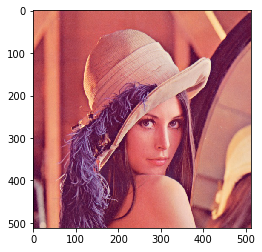

In [5]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Read the image
img = io.imread('lena.jpg')

plt.imshow(img)
plt.show()

In [6]:
img.shape

(512, 512, 3)

In [0]:
# Split
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

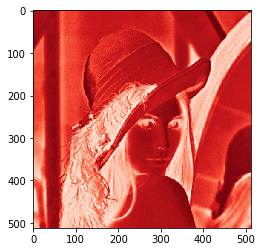

In [8]:
plt.imshow(red, cmap="Reds")
plt.show()

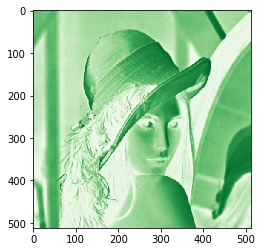

In [9]:
plt.imshow(green, cmap="Greens")
plt.show()

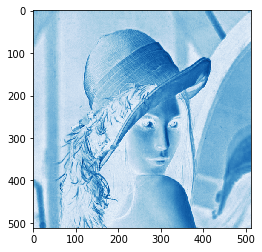

In [10]:
plt.imshow(blue, cmap="Blues")
plt.show()

In [0]:
def plot_3d(X, Y, Z, title, cmap):
    # implement this function to plot the channel pixel values in 3D
    plt.show()

Y = np.arange(img.shape[0])
X = np.arange(img.shape[1])
plot_3d(X, Y, blue, cmap='Blues', title='3D plot for the Blue Channel')
plt.show()

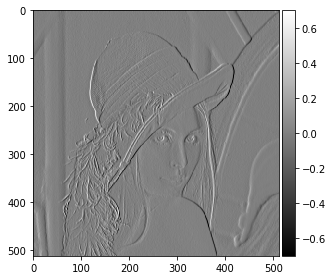

In [0]:

import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
image = imread('lena.jpg',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

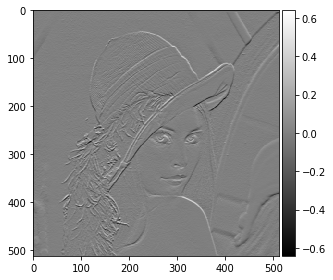

In [0]:
imshow(edges_prewitt_horizontal, cmap='gray')

(128, 64)


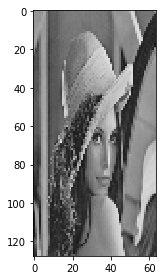

In [0]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

#reading the image 
image = imread('lena.jpg',as_gray=True)
resized_img = resize(image, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)


In [0]:
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

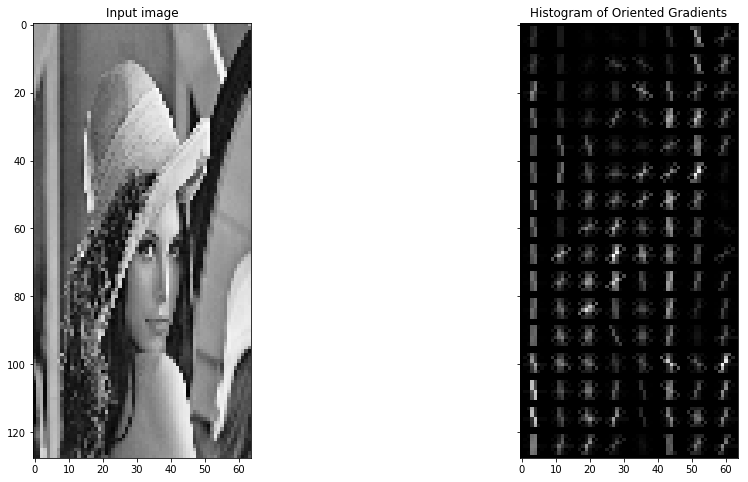

In [0]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [0]:
def filtering(img, f=3):
    
    # Dimensions from the input shape
    (rows, col, channels) = img.shape
    
    # Initialize "hyper parameters"
    stride = 2
    
    # Dimensions of the output
    n_rows = int(1 + (rows - f) / stride)
    n_col = int(1 + (col - f) / stride)
    n_channels = channels
    
    # Initialize output matrix A
    n_img = np.zeros((n_rows, n_col, n_channels))              
    
    # iterate through img
    for h in range(n_rows):                     
        for w in range(n_col):                 
            for c in range (n_channels):            
                vert_start = h*stride
                vert_end = vert_start + f
                horiz_start = w*stride
                horiz_end = horiz_start + f

                # extract slice we are dealing with
                n_slice = img[vert_start:vert_end, horiz_start:horiz_end, c]

                # Compute the filtering operation on the slice
                n_img[h, w, c] = np.mean(n_slice, dtype=int)
    return n_img

(255, 255, 3)


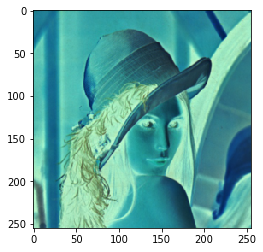

In [0]:
A = filtering(img)
print A.shape
plt.imshow(A)
plt.show()

(251, 251, 3)


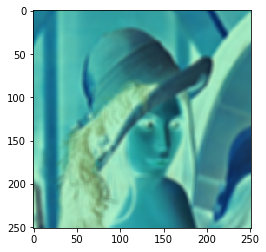

In [0]:
A = filtering(img, f=11)
print A.shape
plt.imshow(A)
plt.show()

(244, 244, 3)


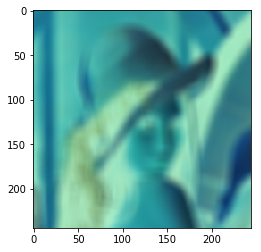

In [0]:
A = filtering(img, f=25)
print A.shape
plt.imshow(A)
plt.show()